# Quantitative methods in finance - First semester hour examination

## Instructions

All instructions available here: [Exam_1](https://drive.google.com/open?id=1D7PHbWnCTR2nSqCaxier6LHSesJtzj0_)

## Question

### Import csv data as DataFrame

We will use os to change the working directory and pandas thus we need to import those libraries: import pandas as pd import os We import other libraries we will use along: import numpy as np import statsmodels.formula.api as smf import statsmodels.api as sm from statsmodels.tsa.arima_model import ARIMA import scipy.stats from statsmodels.graphics.tsaplots import plot_acf from statsmodels.graphics.tsaplots import plot_pacf from statsmodels.tsa.stattools import adfuller 

### Question 

1. Download French population time series from INSEE website: [here](https://raw.githubusercontent.com/thomaspernet/PythonFinanceClass/master/QuantitativeFinance/Datasets/20190913_Fr_population.csv).
2. Extract from zip file to csv file. 
3. Rename the csv file valeurs_mensuelles.csv to 20190913_Fr_population.csv 
4. Place the csv file somewhere on your computer you can load it from.
5. If you still don’t know how to load a file from spyder: 



In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

## Question 2 
1. Import the csv file as a DataFrame you call df 

– from pandas, use `read_csv()`

– data is seperated by ";", so indicate as option sep=";" 

– you can skip the two first rows: skiprows = [0,1] 



In [2]:
url = "https://raw.githubusercontent.com/thomaspernet/PythonFinanceClass/master/" \
"QuantitativeFinance/Datasets/20190913_Fr_population.csv"

df = pd.read_csv(url,
                 skiprows = [0,1,2],
                 sep = ";",
                 names=['date','popF','rubish'])
df.head(2)

,date,popF,rubish
0,2019-08,67039,P
1,2019-07,67022,P


2. Rename the columns 

    – df.columns = [’date’,’popF’,’rubish’] 

3. Convert the date column to aDate format python can recognize 

    – use pd.to_datetime 
    
    – indicate the format it is: YYYY-MM, so format="%Y-%m" 
    
4. place date into the index 

5. as usual we want the old dates first, so sort the index 

    – use .sort_index() 
    
6. keep only ’pop’ column, but you want to keep it as a DataFrame, not a Series, so the trick is to have [ ] around ’popF’: 

    – df = df.loc[:,[’popF’]]  

In [3]:
#df.columns = ['date','popF','rubish']
df['date'] = pd.to_datetime(df['date'], format="%Y-%m")

In [4]:
df = (
    df.set_index('date')
    .sort_index()
    .drop(columns = 'rubish')
)
df.head()

,popF
date,
1994-01-01,59070
1994-02-01,59078
1994-03-01,59090
1994-04-01,59105
1994-05-01,59122


## Question 3 

1. Create an additional column you call ’gr’ where you put the growth rate of the French population. 

    – use the .shift(1) to get Population(t-1) 
    
2. Drop the first row because it has an NA. 

    – use .dropna()

In [5]:
df['gr']= df.pct_change(1)
df.isna().sum()

popF    0
gr      1
dtype: int64

In [6]:
df.head()

,popF,gr
date,,
1994-01-01,59070,NaN
1994-02-01,59078,0.000135
1994-03-01,59090,0.000203
1994-04-01,59105,0.000254
1994-05-01,59122,0.000288


In [7]:
df = df.dropna()

# Question 4 

1. Plot the population 
2. Plot the growth rate 

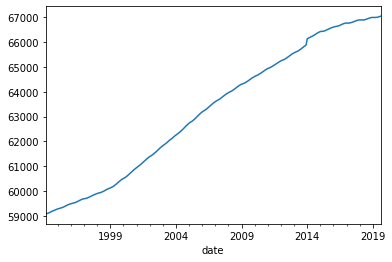

In [8]:
df['popF'].plot()

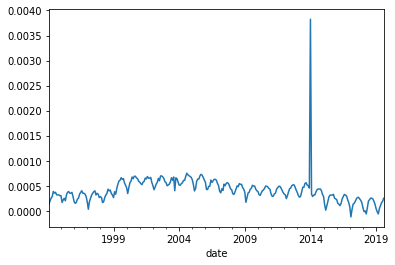

In [9]:
df['gr'].plot()

## Question 5 

1. Compute the mean growth rate 
    
    – you can use .mean() directly to your data frame 
    
2. keep the growth rate in a meanGR variable 

In [10]:
meanGR = df['gr'].mean()
print("The mean growth rate is {0:0.2%}".format(meanGR))

The mean growth rate is 0.04%


## Question 6 

1. Fit a normal law to the growth rates (or just compute the empirical mean and standard deviation) 

    – you can use .mean() and.std()
    
2. generate 307 random draw from this normal law $
\mathscr{N}\left(\mu, \sigma^{2}\right)$ 

$$
f\left(x | \mu, \sigma^{2}\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

    – from numpy use random.normal command indicating mean, standard deviation and size of the sample 
    
3. put that generated sample into a column you call ’grRANDOM’ 

4. Create a column where you replicate the ’popF’ and that you name ’popRANDOM’ 

5. Do a loop starting at 1 and for each index i (use iloc) the popRANDOM is now changed to popRANDOM(i-1) * (1 + grRANDOM) 

6. plot ’popF’ and ’popRANDOM’ thus generated 



In [11]:
sd = df['gr'].std()
sd

0.0002631460365990691

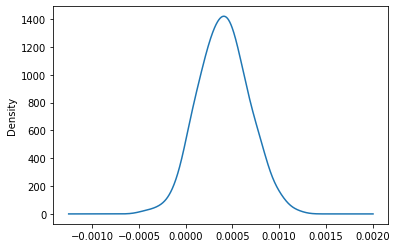

In [12]:
random.seed(123)
s = np.random.normal(meanGR, sd, 307)
pd.Series(s, name = 'empirical dist').plot.density()

In [13]:
df['grRANDOM'] = s
df.head(2)

,popF,gr,grRANDOM
date,,,
1994-02-01,59078,0.000135,0.000127
1994-03-01,59090,0.000203,0.000675


In [14]:
df['popRANDOM'] = df['popF']

$$ popRANDOM(_{i-1}) * (1 + grRANDOM_i) $$

In [15]:
df.head(2)

,popF,gr,grRANDOM,popRANDOM
date,,,,
1994-02-01,59078,0.000135,0.000127,59078
1994-03-01,59090,0.000203,0.000675,59090


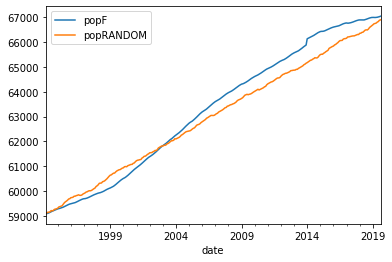

In [16]:
for i in range(1,307):
    df.iloc[i, 3]= df.iloc[i - 1, 3] * (1 + df.iloc[i, 2])
df.head()
df[['popF','popRANDOM']].plot()

In [17]:
#df['lagpopRANDOM'] = df['popRANDOM'].shift(1)
#df.head(2)

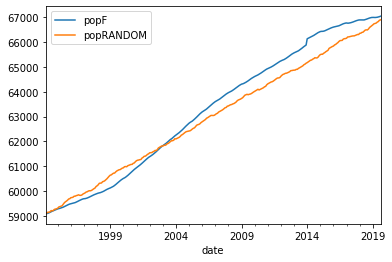

In [18]:
#df["popRANDOM"] = df.apply(lambda x: x['lagpopRANDOM'] * (1 + x['grRANDOM']),
#         axis = 1)#.head()
#df.head()
df[['popF','popRANDOM']].plot()

## Question 7 

Regress X on Y : [source](https://sol.du.ac.in/mod/book/view.php?id=1317&chapterid=1070)


1. Do a linear regression of ’grRANDOM’ on ’gr’, what is theR 2 ? 

2. Do a linear regression of ’popF’ on ’popRANDOM’, what is theR 2 ? 

3. What can you say about spurious regression, is it one? Why? 

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
df.head()

,popF,gr,grRANDOM,popRANDOM
date,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000
1994-03-01,59090,0.000203,0.000675,59117.865027
1994-04-01,59105,0.000254,0.000487,59146.643811
1994-05-01,59122,0.000288,0.000016,59147.587990
1994-06-01,59145,0.000389,0.000260,59162.971241


In [21]:
mod = smf.ols(formula='gr ~ grRANDOM', data=df).fit()
print('R2:{0:0.4%}'.format(mod.rsquared))

R2:0.0094%


In [22]:
mod1 = smf.ols('popRANDOM ~ popF',data=df).fit()
print('R2:{0:0.4%}'.format(mod1.rsquared))

R2:99.2213%


## AR process

$$
y _ { t } = \mu + \gamma y _ { t - 1 } + \epsilon _ { t }
$$

Autoregressive (AR) models are models in which the value of a variable in one period is
related to its values in previous periods.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
def AR(p, mu, lenght, fit = False):
    list_y =[]
    yt_1 = np.random.normal()
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + p*yt_1 + et
        yt_1 = yt
        list_y.append(yt)
    ### Plot result
    # Generated linear fit
    x = np.linspace(0, 10, lenght)
    if fit == True:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,list_y)
        line = slope*x + intercept
        detrend = list_y - line
        f, axarr = plt.subplots(2, sharex=True)
        axarr[0].plot(x, list_y, x, line, label='linear')
        axarr[1].plot(x, detrend, label='detrend')
        plt.legend()
        plt.show()
        return list_y
    else:
        plt.plot(x, list_y, label='linear')
        plt.legend()
        plt.show()

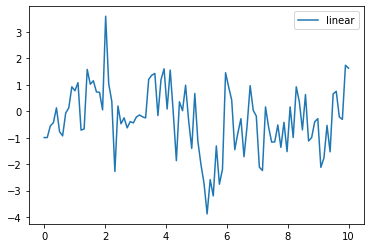

In [62]:
AR(p = 0.3982, mu = 0, lenght = 100, fit = False)

## Process MA

$$
y _ { t } = \mu + \epsilon _ { t } + \theta \epsilon _ { t - 1 }
$$

Moving average (MA) models account for the possibility of a relationship between a variable
and the residuals from previous periods.

In [26]:
def MA(q, mu, lenght):
    list_y =[]
    et_1 = 0
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + et + q* et_1
        et_1 = et
        list_y.append(yt)
    ### Plot result
    x = np.linspace(0, 10, lenght)
    plt.plot(x, list_y, label='linear')
    plt.legend()
    plt.show()

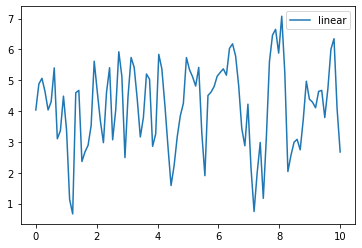

In [27]:
MA(q = 0.8, mu = 4, lenght = 100)

## Process ARMA**

Autoregressive moving average (ARMA) models combine both p autoregressive terms and q
moving average terms, also called ARMA(p,q).

$$
y _ { t } = \mu + \sum _ { i = 1 } ^ { p } \gamma _ { i } y _ { t - i } + \epsilon _ { t } + \sum _ { i = 1 } ^ { q } \theta _ { i } \epsilon _ { t - i }
$$

In [28]:
def ARMA_udf(p, q, mu, lenght, plot = True):
    list_y =[]
    yt_1 = np.random.normal()
    et_1 = 0
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + p*yt_1 + et + q*et_1
        et_1 = et
        yt_1 =  yt
        list_y.append(yt)
    ### Plot result
    if plot == True:
        x = np.linspace(0, 10, lenght)
        plt.plot(x, list_y, label='linear')
        plt.legend()
        plt.show()
    else:    
        return list_y

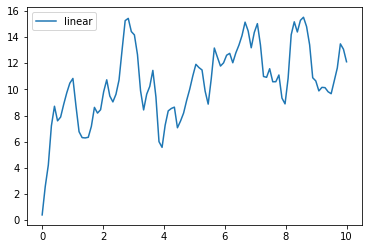

In [29]:
ARMA_udf(p = 0.8,
         q = 0.7,
         mu = 2,
         lenght = 100)

## Stationarity

1.  Detrending

- A variable can be detrended by regressing the variable on a time trend and obtaining the
residuals.

$$
y _ { t } = \mu + \beta t + \varepsilon _ { t }
$$

1. Variable $y_t$

detrend formula:

$$
\hat { \varepsilon } _ { t } = y _ { t } - \hat { \mu } + \hat { \beta } t
$$

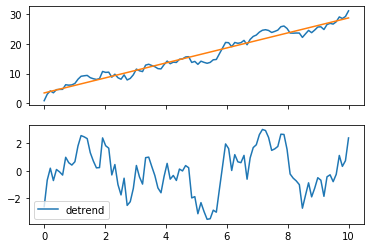

In [30]:
y =AR(p = .978, mu = 0.6, lenght = 100, fit = True)

2. Differencing

When a variable $y_t$ is not stationary, a common solution is to use a differenced variable :

- $\Delta y _ { t } = y _ { t } - y _ { t - 1 }$ for first order differences.
- The variable $y_t$ is integrated of order one, denoted I(1), if taking a first difference produces a
stationary process.
- ARIMA (p,d,q) denotes an ARMA model with p autoregressive lags, q moving average lags, a
and difference in the order of d.

Differenced variable

- $\Delta y _ { t } = y _ { t } - y _ { t - 1 }$

In [31]:
def detrend_dif(y, print = True):
    T = len(y)
    list_delta = []
    for t in range(1, T):
        delta_y = y[t] - y[t-1]
        list_delta.append(delta_y)
    if print == True:
        x = np.linspace(0, 10, T-1)
        plt.plot(x, list_delta, label='first Differenced')
        plt.legend()
        plt.show()
    else:
        return np.array(list_delta)

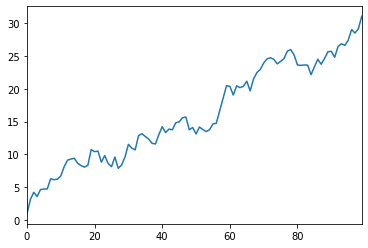

In [32]:
pd.Series(y, name = 'trend').plot()

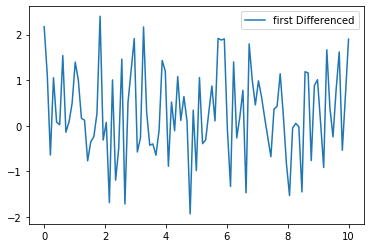

In [33]:
detrend_dif(y)

## Dickey-Fuller Test for Stationarity

1. Dickey-Fuller test

Assume an AR(1) model. The model is non-stationary or a unit root is present if $| \rho | = 1$

$
\left. \begin{array} { c } { y _ { t } = \rho y _ { t - 1 } + e _ { t } } \\ { y _ { t } - y _ { t - 1 } = \rho y _ { t - 1 } - y _ { t - 1 } + e _ { t } } \\ { \Delta y _ { t } = ( \rho - 1 ) y _ { t - 1 } + e _ { t } = \gamma y _ { t - 1 } + e _ { t } } \end{array} \right.
$

- We can estimate the above model and test for the significance of the $\gamma$ coefficient.
    - If the null hypothesis is not rejected, $\gamma ^ { * } = 0$, then $y_t$ is not stationary. Difference the
variable and repeat the Dickey-Fuller test to see if the differenced variable is stationary.
    - If the null hypothesis is rejected, $\gamma ^ { * } > 0$ tehn $y_t$ is stationary. Use the variable.
    - Note that non-significance is means stationarity.

In [34]:
from scipy.ndimage.interpolation import shift
y_lag = shift(y,-1)[:-1]
y_lag.shape

(99,)

In [35]:
def df_test(y, y_lag):
    slope, intercept, r_value, p_value, std_err = stats.linregress(y[:-1],y_lag)
    if p_value > 0.05:
        print("Hyp 1 accepted, serie non stationary. P value is {}".format(p_value))
    print("Hyp 1 rejected, serie stationary. P value is {}".format(p_value))

In [36]:
df_test(y, y_lag)

Hyp 1 rejected, serie stationary. P value is 1.973723108001099e-87


## ADF

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [37]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

## Question 8 

1. Perform an Augmented Dickey-Fuller test on the population level and on its growth rate. You should find that in fact we are working with a I(2) series. Thus we should differentiate twice (for simplicity, we work with growth rate and keep in mind this issue for further exercise). 

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

TextBook:

[Bourdonnais](https://drive.google.com/open?id=1aISXNGmc-Ntfbt7MpPkSf5clpnAfFObW)

Online Ressource:

[machinelearningmastery](https://machinelearningmastery.com/time-series-data-stationary-python/)

In [38]:
from statsmodels.tsa.stattools import adfuller

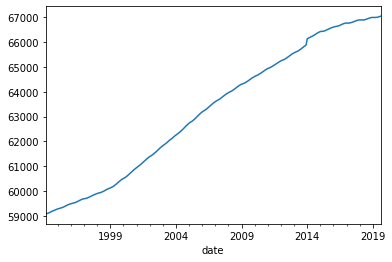

In [39]:
df['popF'].plot()

$$
\Delta y_{t}=\mu+\beta t+\gamma^{*} y_{t-1}+\sum_{j=1}^{p-1} \phi_{j} \Delta y_{t-j}+\epsilon_{t}
$$

If p-values lower than 0.05 then we reject the null hypothesis ie (stationairy)

In [40]:
result = adfuller(
    df['popF'],
    regression='ct')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.974677
p-value: 0.947428
Critical Values:
	1%: -3.990
	5%: -3.426
	10%: -3.136


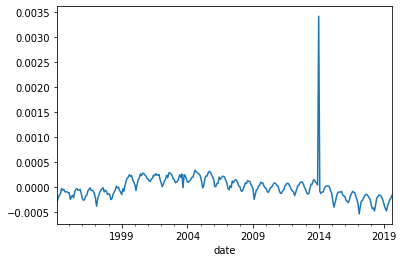

In [41]:
(df['gr'] - meanGR).plot()

It looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

In [42]:
adfTest = adfuller(df['gr'] - meanGR,
                   regression='nc')

print('ADF Statistic: %f' % adfTest[0])
print('p-value: %f' % adfTest[1])
print('Critical Values:')
for key, value in adfTest[4].items():
	print('\t%s: %.3f' % (key, value))
adfTest[0:4]

ADF Statistic: -1.612305
p-value: 0.100830
Critical Values:
	1%: -2.573
	5%: -1.942
	10%: -1.616


(-1.6123051353633324, 0.10082989292124006, 11, 295)

## Question 9 

1. Extract the month from the index date format and place it into a column you call ’month’ 

    – you can extract the month from a date format with .month 

2. use the groupby function to compute the mean growth rate per month into a Series you call meanGRmonth 

    – don’t forget to apply the .mean() to this groupby command 
    
3. remove the meanGR from meanGRmonth to have the deviation 

We want to remove the mean growth rate (meanGR) to the monthly average growth rate so that we have growth rates deviation from the mean. In other words, if I am in month 2 and I want to project in month 3, I use: 

$$
E_{3}\left(\mathrm{pop}_{3}\right)=\operatorname{pop}_{2}(1+\mathrm{meanGR}+\mathrm{meanGRmonth})
$$

In [43]:
df['month'] = df.index.month
df.head()

,popF,gr,grRANDOM,popRANDOM,month
date,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2
1994-03-01,59090,0.000203,0.000675,59117.865027,3
1994-04-01,59105,0.000254,0.000487,59146.643811,4
1994-05-01,59122,0.000288,0.000016,59147.587990,5
1994-06-01,59145,0.000389,0.000260,59162.971241,6


In [44]:
meanGRmonth = (
    df.groupby('month')['gr']
    .mean()
    .apply(lambda x: x - meanGR)
              )
meanGRmonth

month
1     0.000079
2    -0.000142
3    -0.000139
4    -0.000088
5    -0.000043
6     0.000030
7     0.000041
8     0.000087
9     0.000074
10    0.000077
11    0.000042
12   -0.000008
Name: gr, dtype: float64

## Question 10 

1. Last observation is 2019-08-01, add a row below for 2019-09-01 we want to estimate 

    – you can get inspired from this question 
    
    – you want the index to be a date, so use name=pd.to_datetime(’2019-09-01’) 

In [45]:
df_forecast = df.append(pd.Series(name=pd.to_datetime('2019-09-01')))
df_forecast.tail()

,popF,gr,grRANDOM,popRANDOM,month
date,,,,,
2019-05-01,66998.0,0.000104,0.000573,66800.699770,5.0
2019-06-01,67009.0,0.000164,0.000374,66825.712777,6.0
2019-07-01,67022.0,0.000194,0.000759,66876.420020,7.0
2019-08-01,67039.0,0.000254,0.000227,66891.600565,8.0
2019-09-01,NaN,NaN,NaN,NaN,NaN


In [46]:
#df.index = df.index + pd.DateOffset(months=1)

## Question 11 

1. Project by one month using equation

$$
E_{3}\left(\mathrm{pop}_{3}\right)=\operatorname{pop}_{2}(1+\mathrm{meanGR}+\mathrm{meanGRmonth_3})
$$

In [47]:
spepmeanGR = meanGRmonth[9]
spepmeanGR

7.36827194416845e-05

In [48]:
df_forecast[df_forecast.index.isin(['2019-08-01'])
   ]['popF'].apply(lambda x: (x * (1 + meanGR + spepmeanGR)))


date
2019-08-01    67071.582399
Name: popF, dtype: float64

## Question 12 

1. Remove seasonality from the time series: do it on the growth rate when projection the population level. Create a new column you call ’popFds’ for de desesonalized time series. 

2. Compute the deseasonlized and demean growth rate you call ’grds’. 

3. plot and drop NAs of this time series. 

4. Apply an Augmented Dickey-Fuller test, is the time series now stationary? Manual creation of an AR(1) on the deseasonalized and demeaned growth rate. 

move seasonality:  $gr_{t_{0}} = gr_{t_{-1}} * (1 + gr_{t_{0}} - \text{mean month}_{t_{0}})$

In [49]:
#meanGRmonth = meanGRmonth.rename("demeangr").reset_index()
#meanGRmonth.head()
df.head()

,popF,gr,grRANDOM,popRANDOM,month
date,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2
1994-03-01,59090,0.000203,0.000675,59117.865027,3
1994-04-01,59105,0.000254,0.000487,59146.643811,4
1994-05-01,59122,0.000288,0.000016,59147.587990,5
1994-06-01,59145,0.000389,0.000260,59162.971241,6


In [50]:
df['popFds'] = df['popF']

for i in range(1,len(df)):
    df.iloc[i,5] = df.iloc[i-1,5] * (1 + df.iloc[i,1] - meanGRmonth.loc[df.iloc[i,4]])

In [51]:
df.head()

,popF,gr,grRANDOM,popRANDOM,month,popFds
date,,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2,59078.000000
1994-03-01,59090,0.000203,0.000675,59117.865027,3,59098.214395
1994-04-01,59105,0.000254,0.000487,59146.643811,4,59118.402497
1994-05-01,59122,0.000288,0.000016,59147.587990,5,59137.961504
1994-06-01,59145,0.000389,0.000260,59162.971241,6,59159.183255


Demean and deseasonlized serie: $ $ 

In [52]:
df['grds'] = (df.popFds - df.popFds.shift(1)) / df.popFds.shift(1) - \
    ((df.popFds - df.popFds.shift(1)) / df.popFds.shift(1)).mean()
#df = df.dropna()

In [53]:
df.head()

,popF,gr,grRANDOM,popRANDOM,month,popFds,grds
date,,,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2,59078.000000,NaN
1994-03-01,59090,0.000203,0.000675,59117.865027,3,59098.214395,-0.000071
1994-04-01,59105,0.000254,0.000487,59146.643811,4,59118.402497,-0.000071
1994-05-01,59122,0.000288,0.000016,59147.587990,5,59137.961504,-0.000082
1994-06-01,59145,0.000389,0.000260,59162.971241,6,59159.183255,-0.000054


In [54]:
#df['popFds'].pct_change(1)/(df['popFds'].shift(1) - df['popFds'].pct_change(1)) /  df['popFds'].shift(1).mean()

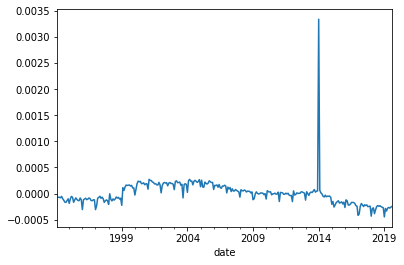

In [56]:
df['grds'].plot()

Apply an Augmented Dickey-Fuller test, is the time series now stationary? 

In [ ]:
adfuller(df['grds'], regression='nc')

## Question 13 

Manual creation of an AR(1) on the deseasonalized and demeaned growth rate.

1. Create a lag of the deseasonalized and demeaned growth rate you call ’grds1’ : 

    – Use the shift(1) command 

2. Perform an OLS of grds on grds1 and show the result of that linear regression 

3. Using the parameter of ’grds1’, project the grds into a variable you call ’grdsAR1’ 

4. Compute the residuals of that model 

5. Compute the standad deviation of the residuals of the AR(1) created by OLS 

In [57]:
df['grdslag'] = df['grds'].shift(1)

**Process AR**

$$
y _ { t } = \mu + \gamma y _ { t - 1 } + \epsilon _ { t }
$$

Autoregressive (AR) models are models in which the value of a variable in one period is
related to its values in previous periods.

In [60]:
olsAR1 = smf.ols('grds ~ grdslag',data=df).fit()
olsAR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   grds   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     56.90
Date:                Sat, 21 Sep 2019   Prob (F-statistic):           5.38e-13
Time:                        18:58:51   Log-Likelihood:                 2122.5
No. Observations:                 305   AIC:                            -4241.
Df Residuals:                     303   BIC:                            -4234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.923e-08   1.32e-05     -0.007      0.995   -2.61e-05    2.59e-05
grdslag        0.3982      0.053      7.543      0.000       0.294       0.502
==============================================================================
Omnibus:                      521.994   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259555.571
Skew:                           9.231   Prob(JB):                         0.00
Kurtosis:                     144.715   Cond. No.                     4.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
olsAR1 = smf.ols('grds ~ grdslag - 1',data=df).fit()
olsAR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   grds   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.155
Method:                 Least Squares   F-statistic:                              57.09
Date:                Sat, 21 Sep 2019   Prob (F-statistic):                    4.93e-13
Time:                        19:07:12   Log-Likelihood:                          2122.5
No. Observations:                 305   AIC:                                     -4243.
Df Residuals:                     304   BIC:                                     -4239.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grdslag        0.3982      0.053      7.556      0.000       0.294       0.502
==============================================================================
Omnibus:                      521.994   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259555.482
Skew:                           9.231   Prob(JB):                         0.00
Kurtosis:                     144.715   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

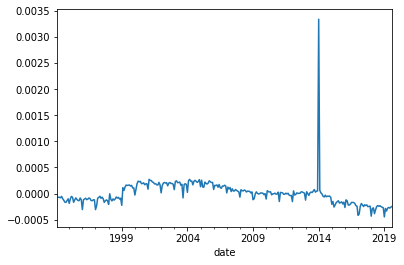

In [65]:
df['grds'].plot()

In [79]:
df['grdslag'].head()

date
1994-02-01         NaN
1994-03-01         NaN
1994-04-01   -0.000071
1994-05-01   -0.000071
1994-06-01   -0.000082
Name: grdslag, dtype: float64

In [80]:
olsAR1.params[0]

0.3981993187065122

In [78]:
-0.000071 * 0.3982

-2.82722e-05

$y_t = 0 + .3982 * y_{t_{-1}}$

In [81]:
df['grdslag'].apply(lambda x: x * olsAR1.params[0]).head()

date
1994-02-01         NaN
1994-03-01         NaN
1994-04-01   -0.000028
1994-05-01   -0.000028
1994-06-01   -0.000033
Name: grdslag, dtype: float64

In [82]:
df['grdsAR1'] = olsAR1.predict(df['grdslag'])
df.head()

,popF,gr,grRANDOM,popRANDOM,month,popFds,grds,grdslag,grdsAR1
date,,,,,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2,59078.000000,NaN,NaN,NaN
1994-03-01,59090,0.000203,0.000675,59117.865027,3,59098.214395,-0.000071,NaN,NaN
1994-04-01,59105,0.000254,0.000487,59146.643811,4,59118.402497,-0.000071,-0.000071,-0.000028
1994-05-01,59122,0.000288,0.000016,59147.587990,5,59137.961504,-0.000082,-0.000071,-0.000028
1994-06-01,59145,0.000389,0.000260,59162.971241,6,59159.183255,-0.000054,-0.000082,-0.000033


In [83]:
df['AR1residuals'] = df['grds'] - df['grdsAR1']
df.head()

,popF,gr,grRANDOM,popRANDOM,month,popFds,grds,grdslag,grdsAR1,AR1residuals
date,,,,,,,,,,
1994-02-01,59078,0.000135,0.000127,59078.000000,2,59078.000000,NaN,NaN,NaN,NaN
1994-03-01,59090,0.000203,0.000675,59117.865027,3,59098.214395,-0.000071,NaN,NaN,NaN
1994-04-01,59105,0.000254,0.000487,59146.643811,4,59118.402497,-0.000071,-0.000071,-0.000028,-0.000043
1994-05-01,59122,0.000288,0.000016,59147.587990,5,59137.961504,-0.000082,-0.000071,-0.000028,-0.000054
1994-06-01,59145,0.000389,0.000260,59162.971241,6,59159.183255,-0.000054,-0.000082,-0.000033,-0.000021


In [84]:
df['AR1residuals'].std()

0.00023023150482036459

## Question 14 

1. Fit an AR(1) on ’grds’ using the ARIMA command 

2. Compute the standard deviation of the residuals of that model, compare it to the standard deviation of the AR(1) model by OLS 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
modelAR1 = ARIMA(df['grds'], order=(1,0,0))
model_fitAR1 = modelAR1.fit(disp=0)
model_fitAR1.resid.std()

## Question 15 

1. Plot the partial autocorrelation function and the autocorrelation function of ’grds’, which AR order and MA order would you suggest? 

2. compare your choice with the suggestions based on AIC and BIC 

3. Fit an ARIMA model on ’grds’ and compute the standard deviation of the residuals, how does it compare to the AR(1) by OLS and AR(1) by ML (to be more precise, by default, the estimation method is ’css-mle’ detailed here)? 

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def PAC(y, lag = 10): 
    f, (ax1, ax2) = plt.subplots(2, sharex=True)
    plot_acf(y, ax=ax1, lags = lag)
    plot_pacf(y, ax=ax2, lags = lag)
    plt.show()

In [ ]:
PAC(y = df['grds'], lag = 10)

In [ ]:
# Fit an ARMA with the procedure and test with AIC or BIC
ARMAfit = sm.tsa.arma_order_select_ic(df['grds'], ic=['aic', 'bic'], trend='nc')
ARMAfit.aic_min_order


In [ ]:
ARMAfit.bic_min_order

In [ ]:
# fit the arma
model = ARIMA(df['grds'], order=(1,0,1))
model_fit = model.fit(disp=0)

In [ ]:
model_fit.summary()

In [ ]:
model_fit.resid.plot()
plot_acf(model_fit.resid, lags=40)

## Question 16 

1. Plot the autocorrelation function of the model residuals. 

2. Perform a Ljung-Box test with maximum lags of 5 and 10. Conclude on the relevance of this model? 

[Ljung-Box](https://www.statisticshowto.datasciencecentral.com/ljung-box-test/)